<a href="https://colab.research.google.com/github/badcortex/opt4ds/blob/master/esercitazione1_opt4ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Discrete Distributions in $\mathbb{R}^3$

We have to represent a discrete measure $\mu(X)$ with $X \subseteq \mathbb{R}^3$. Suppose we are given a finite number of $n$ support point $\mathbf{x}_i \subseteq \mathbb{R}$, then we can define the discrete measure: 

$$
\delta = \sum_{i = 1}^n w_i \delta(\mathbf{x}_i)
$$


A point of $\mathbb{R}^3$ can be represented  with a tuple of 3 floats with the following class.

In [0]:
class Point3D(object):
  def __init__(self, x1=0, x2=0, x3=0):
    self.x1 = x1
    self.x2 = x2 
    self.x3 = x3

  def __str__(self):
    return "( x1 = {}, x2 = {}, x3 = {} )".format(self.x1, self.x2, self.x3)

  def __repr__(self): 
    return self.__str__()

A possible implementation of the **DiscreteMeasure** class is the following.

In [0]:
from random import random, uniform, seed

In [0]:
class DiscreteMeasure(object):
  def __init__(self, n, a=0, b=100):
    self.Xs = [Point3D(uniform(a,b), uniform(a,b), uniform(a,b)) for _ in range(n)]
    Ws = []
    for _ in range(n):
      Ws.append(random())
    tot = sum(Ws)
    for i, w in enumerate(Ws):
      Ws[i] = w/tot
    self.Ws = Ws
  
  def __str__(self):
    s = "["
    for i, (x,w) in enumerate(zip(self.Xs, self.Ws)):
      s += "w_{} = {}, p_{} = {}\n".format(i, str(w), i, str(x))
    s += "]"
    return s.replace(",\n]","]")

Now, we want to plot our discrete distributions on $\mathbb{R}^3$.

In [0]:
mu = DiscreteMeasure(40, 10, 30)
nu = DiscreteMeasure(40, 25, 50)

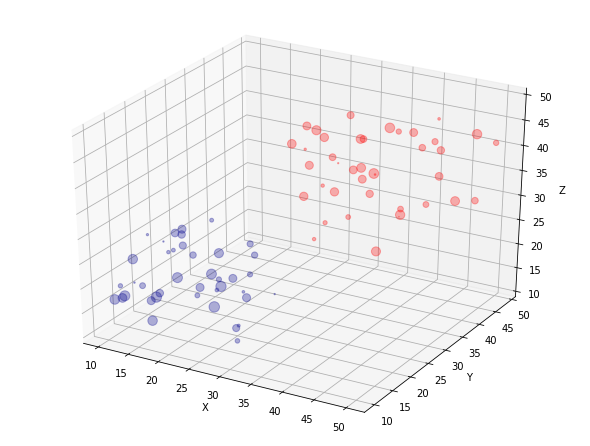

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

ax.scatter([p.x1 for p in mu.Xs],
           [p.x2 for p in mu.Xs],
           [p.x3 for p in mu.Xs],
           s=[(2000*w) for w in mu.Ws],
           color="darkblue", alpha=0.3,
           marker="o")

ax.scatter([p.x1 for p in nu.Xs],
           [p.x2 for p in nu.Xs],
           [p.x3 for p in nu.Xs],
           s=[(2000*w) for w in nu.Ws],
           color="red", alpha=0.3,
           marker="o")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Write a function **CostMatrix(mu, nu)** that takes in input two **DiscreteMeasure** distributions, and computes a dense matrix containing the Euclidean distance from every support point of **mu** to every support point of nu. Store the matrix using a dictionary, where the key is a pair $(i,j)$ representing the $i$-th support point of **mu** and the $j$-th support points of **nu**. The value associated to the key is $|x_i - y_j|$, where $x_i$ are the support points of **mu**, and $y_j$ are the support points of **nu**.  

In [0]:
from math import sqrt, pow

def CostMatrix(mu, nu):
  dist = dict()
  for i in range(len(mu.Xs)):
    for j in range(len(nu.Xs)):
       dist[(i,j)] = sqrt(pow(mu.Xs[i].x1 - nu.Xs[j].x1, 2) + pow(mu.Xs[i].x2 - nu.Xs[j].x2, 2) + pow(mu.Xs[i].x3 - nu.Xs[j].x3, 2))
  
  return dist


In [0]:
cost = CostMatrix(mu, nu)

print(cost)

### 2. The LinearConstraint class

Write a class definition for the type **LinearConstraint**. This class has three attributes: **As**, **B** ans **S**. The first is a list of float numbers representing the coeffcients, the second is the right hand side coefficient, and the third is the sign of the constraint (i.e, <=, >=, =). The three parameters are passed in input to the `__init__(self, As, S, B)` constructor. 

The class must implement the `__str__` method.

In addition, the class defines a `check(Xs)` method, that takes in input a list of values of the same length of **As**, and checks if the linear constraint represented by **As**, **S**, **B** is satisfied. If the length of **Xs** is different from the length of **As** the method raises an exception of type **RunTypeException**.

In [0]:
class LinearConstraint(object):
  def __init__(self, As, S, B):
    self.As = As
    self.S = S
    self.B = B

  def __str__(self):
    return "As = {}, S ={}, B = {}".format(self.As, self.S, self.B)

  def check(self, Xs):
    if self.S in ("<=",">=","="):
      if len(Xs) == len(self.As):
        f = sum([Xs*As for Xs, As in zip(Xs, As)]) 
        if self.S == "<=":
          if f <= self.B:
            print("Linear constraint is satisfied!")
          else:
            print("Linear constraint is not satisfied!")
        elif self.S == ">=":
          if f >= self.B:
            print("Linear constraint is satisfied!")
          else:
            print("Linear constraint is not satisfied!")
        else:
          if f == self.B:
            print("Linear constraint is satisfied!")
          else:
            print("Linear constraint is not satisfied!")
      else:
        raise Exception("Invalind length!")
    else:
      raise Exception("Invalid constraint sign!")



In [34]:
lc = LinearConstraint([1,2,3,4], "=", 10)
Xs = [1,1,1,2]

lc.check(Xs)

Linear constraint is not satisfied!
